In [3]:
from functools import partial
import geopandas as gpd
from geopandas.tools import geocode
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox
import matplotlib.font_manager as fm
import urllib.request
import os

In [4]:
city_name = "College Station, Texas"
buffer = 15000
crs = 2277

In [5]:
geolocator = Nominatim(user_agent="OSM_map")
geocode2 = partial(geolocator.geocode, language="en")
cities_df = geocode(city_name, provider='nominatim', user_agent='OSM_map', timeout=4)
cities_df = cities_df.to_crs(epsg=crs)

In [6]:
cities_df

,geometry,address
0,POINT (3550634.767 10211122.474),"College Station, Brazos County, Texas, United ..."


In [7]:
cities_df['buffer'] = cities_df['geometry'].buffer(buffer)
# Set the active geometry column to 'buffer'
cities_df = cities_df.set_geometry('buffer')
cities_df = cities_df.to_crs(epsg=4326)

In [8]:
drive_graph = ox.graph_from_polygon(cities_df['buffer'].iloc[0], network_type='drive')
bike_graph = ox.graph_from_polygon(cities_df['buffer'].iloc[0], network_type='bike')
graph = nx.compose(drive_graph, bike_graph)
nodes, edges = ox.graph_to_gdfs(graph)

In [9]:
url = 'https://github.com/google/fonts/raw/main/ofl/lato/Lato-Regular.ttf'
font_path = 'Lato-Regular.ttf'
if not os.path.exists(font_path):
    urllib.request.urlretrieve(url, font_path)
lato_prop = fm.FontProperties(fname=font_path)

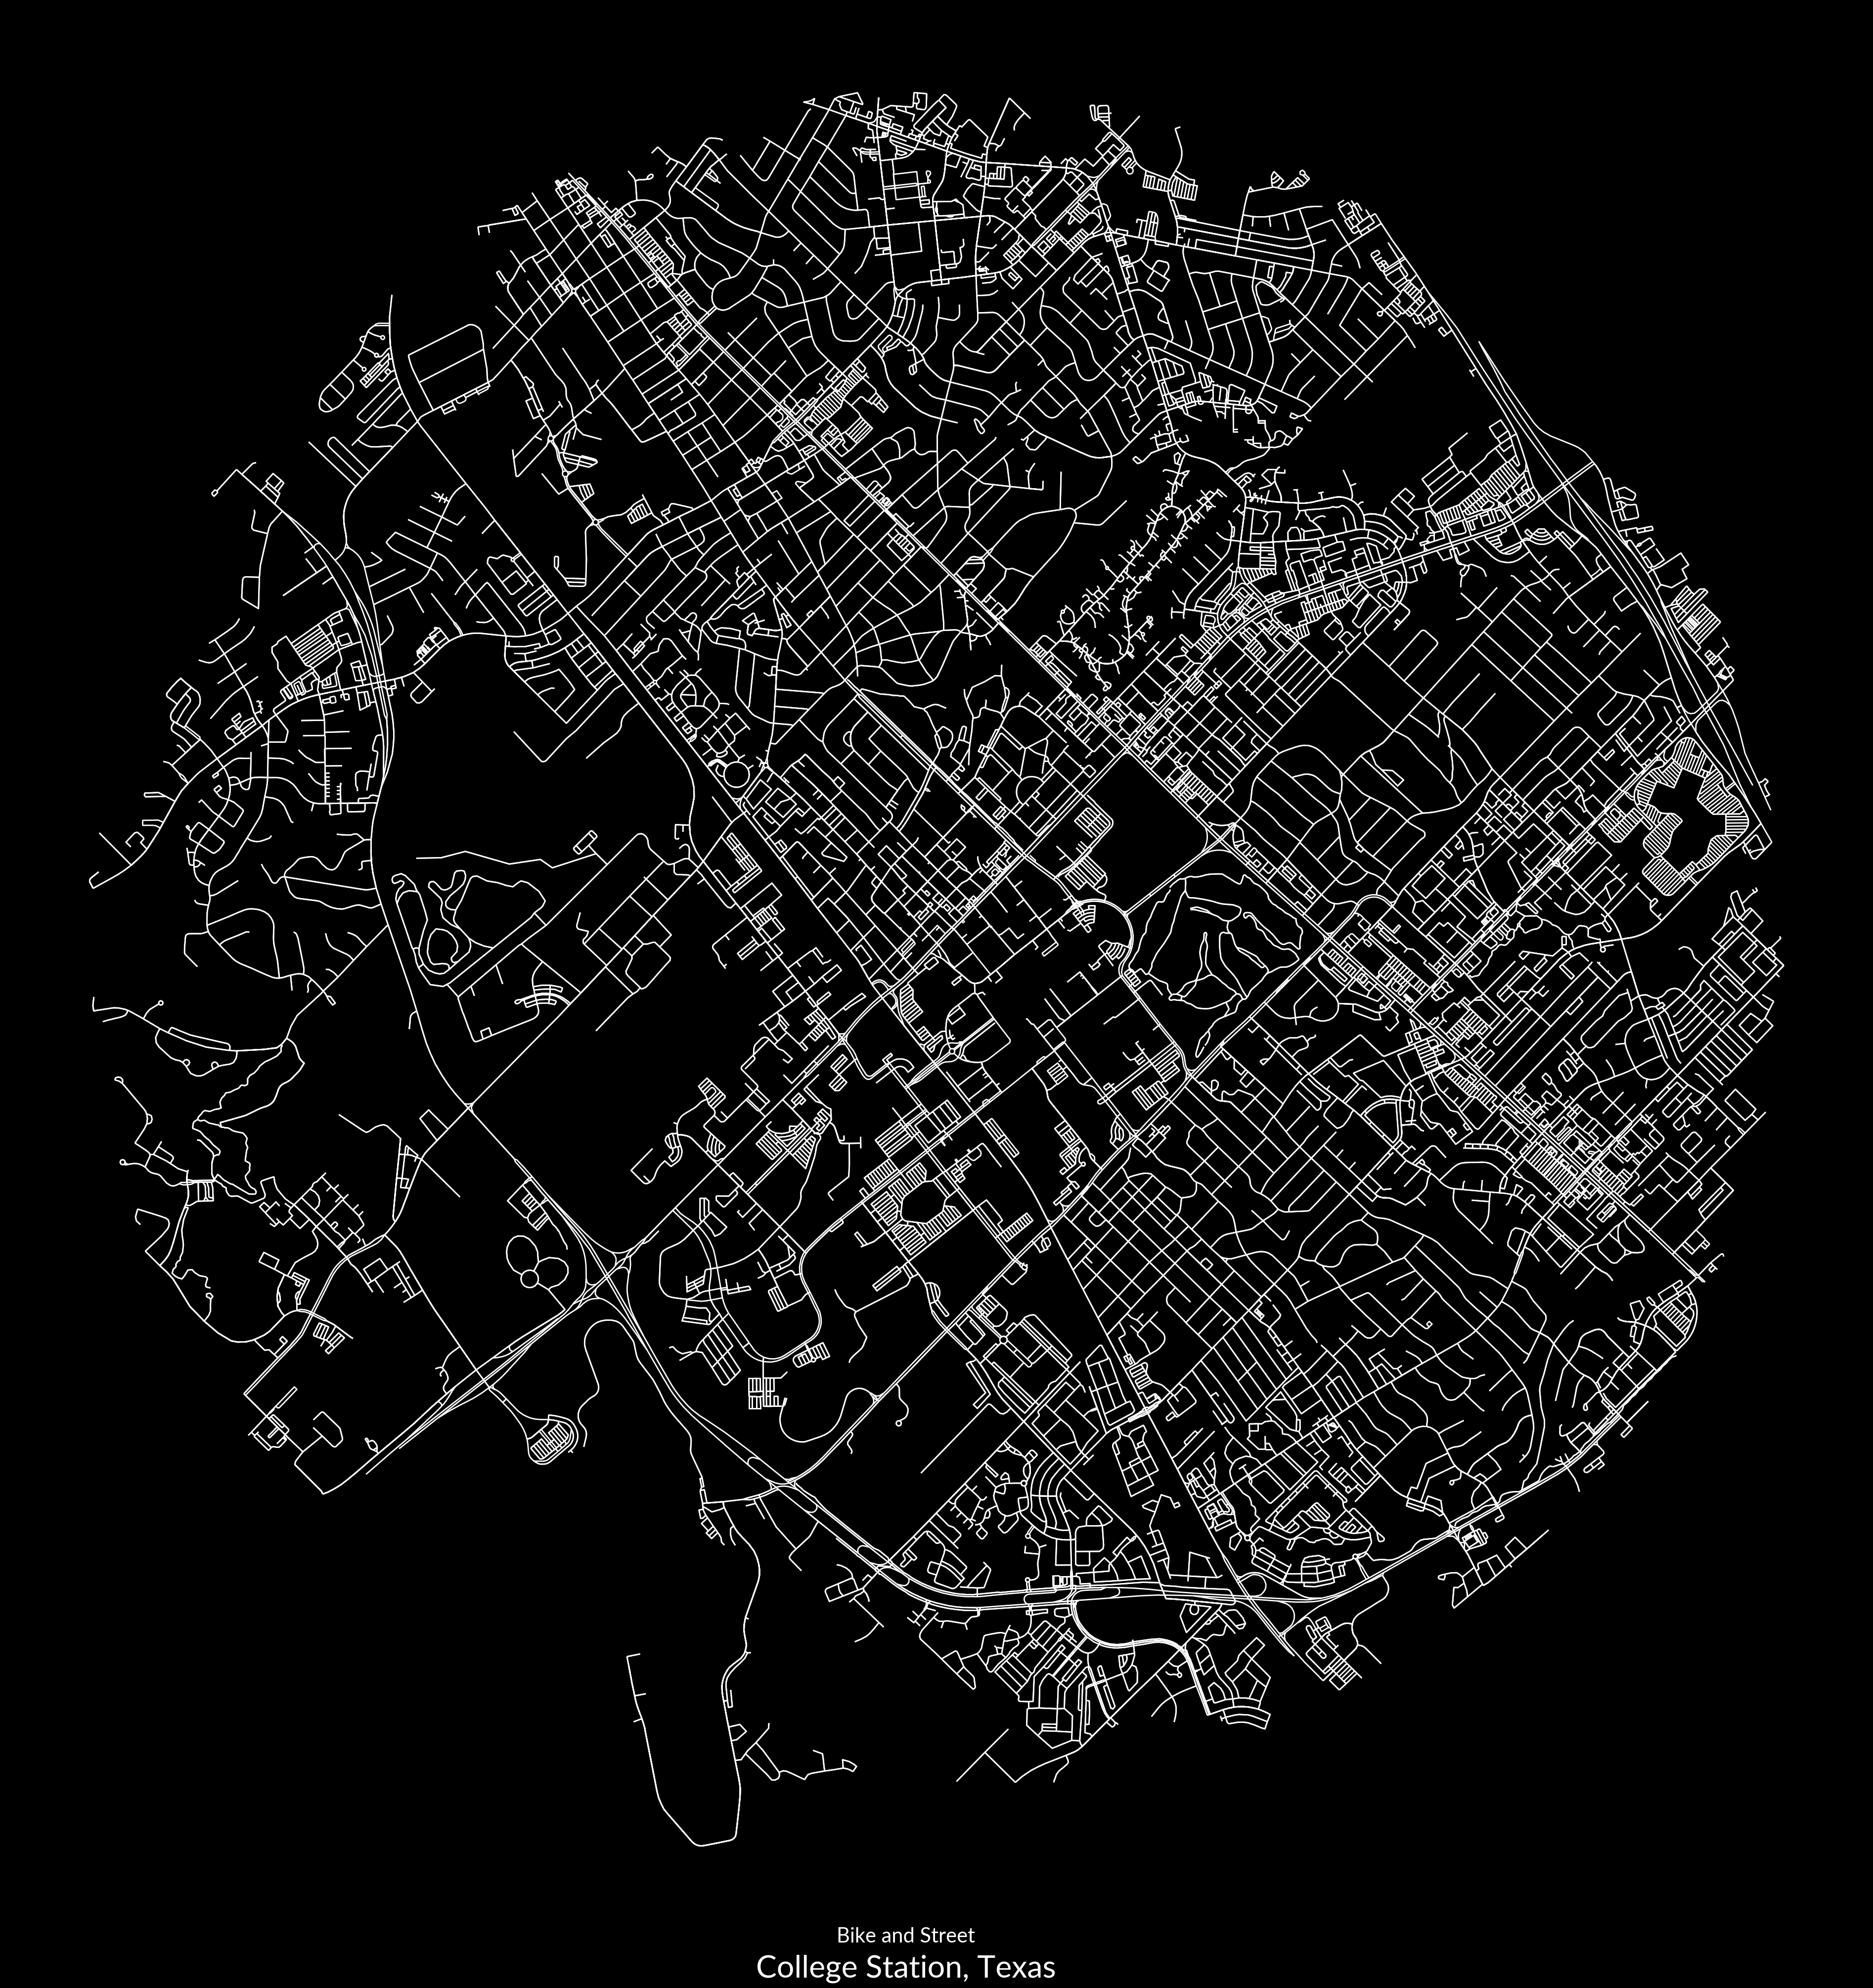

In [10]:
fig, ax = plt.subplots(figsize=(50,50))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')
edges.plot(ax=ax, color='white', linewidth=2)
fig.subplots_adjust(bottom=0.10)
fig.text(0.5, 0.08, "College Station, Texas", fontproperties=lato_prop, fontsize=45,
         color='white', ha='center',  va='bottom')
fig.text(0.5, 0.095, "Bike and Street", fontproperties=lato_prop, fontsize=30, style='italic',
         color='white', ha='center',  va='bottom')
ax.set_axis_off()

# Save the plot
plt.savefig("collegestation_map.png", format='png', dpi=150,bbox_inches='tight', facecolor=fig.get_facecolor())
plt.show()
plt.close()